# Functoriality

motivation: 

- to build larger functors from smaller ones

- and see which type ctor which correspond to mappings
between objects in a category can be extended to functors,
including mappings between morphisms


_P/113 bifunctor_

just like you can have a function of two args, you can have 
a functor of two args, or a `bifunctor`

on objects, a bifunctor **maps every pair of objects**, one
from category $C$, and one from category $D$, **to an object
in category $E$**.

**it's a mapping from a cartesian product of categories $C \times D$
to $E$**

a bifunctor has to map morphisms as well - **it maps a
pair of morphisms, one from $C$, one from $D$ to
a morphism in $E$**

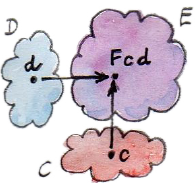

In [7]:
import Data.Bifunctor

e1 :: Either Int String
e1 = Left 1

e2 :: Either Int String
e2 = Right "iddqd"

bimap (+ 1) (<> "asd") e1

bimap (+ 1) (<> "asd") e2

Left 2

Right "iddqdasd"

_P/116 product and coproduct bifunctors_

an important example of a bifunctors is the categorical
product - a product of two objects that is defined
by a universal construction.

**if the product exists for any pair of objects, the mapping
from those objects to the product is bifunctorial**

In [24]:
import Data.Bifunctor

newtype BiComp bf fu gu a b = BiComp (bf (fu a) (gu b))

newtype Const a b = Const a

newtype Identity a = Identity a

type Maybe_ = BiComp Either (Const ()) Identity Int String
--                                              ^^^ is ignored

v1 :: Maybe_ 
v1 = undefined

instance (Bifunctor bf, Functor fu, Functor gu) =>
    Bifunctor (BiComp bf fu gu) where
        bimap f1 f2 (BiComp x) = BiComp (bimap (fmap f1) (fmap f2) x)

_P/121 automatically derive functor for algebraic types_

algebraic types use functorial building primitives, therefore
they are functors

In [39]:
{-# LANGUAGE DeriveFunctor #-}

data Creature a
    = Gunner
    | Imp a
    deriving (Eq, Functor, Show)
    
(+ 1) <$> Imp 123

length . show <$> Gunner

-- by default `b` is the parameter that makes Record qualified for
-- functor; therefore the automatically derivation and fmap
-- only works on `b`
data Record a b = Record { name :: a 
                         , age :: b
                         }
                deriving (Eq, Functor, Show)

(+ 1) <$> Record { name = 1, age = 1 }

-- NOTE: "well-kinded" types do not qualified for functor (types
-- that do no have parameter)

Imp 124

Gunner

Record {name = 1, age = 2}

_P/124 writer functor_

embellishment was related to endofunctors

you can replace `Writer` with any type ctor

as long as it supports a fish operator and `return`, you
can define `fmap` as well

**so the embellishment in Kleisli category is always a functor**

In [65]:
type Writer a = (a, String)

wa :: Writer Int
wa = (10, "")

ret :: a -> Writer a
ret x = (x, "")


(>=>) :: (a -> Writer b) -> (b -> Writer c) -> (a -> Writer c)
--        ^ a is a type parameter, hence does not have to be
--          "normal type"; here a is actually `Writer <param>`
--          therefore the resulting function is of type:
--          Writer <param> -> Writer c
m1 >=> m2 = \x -> let (o1, s1) = m1 x
                      (o2, s2) = m2 o1
                  in (o2, s1 ++ s2)
                  
ffmap f = id >=> (ret . f) 
ffmap (+ 111) wa

(121,"")

_P/127 review the reader functor_

is the function constructor a bifunctor too?

_P/128 covariant and contravariant functor_

**a mapping of categories that inverts the
direction of morphisms is called a contravariant
functor**

**the regular functions, are called covariant functors**

MY NOTE:

recall Scala's type system (its generic collection):

```
T[A] invariant, in the subclass of T[A], A must be A

T[A+] covariant, in the subclass of T[A], A can be subclass of A

T[A-] contravariant, in the subclass of T[A], A must be superclass of A
```

In [91]:
import Data.Typeable

-- with value
typeOf 1

newtype BiComp bf fu gu a b = BiComp (bf (fu a) (gu b))

newtype Const a b = Const a
newtype Identity a = Identity a

type MaybeString = BiComp Either (Const ()) Identity Int String

-- with bottom
typeRep (undefined :: MaybeString)

-- similarly, C++ has `decltype(std::declval<T>().someMethod())`
-- it works as if I have an instance of T

Integer

[Char]